# CSE 454 - Data Mining Course
----------------------------------------------------------------------
# Trending YouTube Video Statistics Project 
-----------------------------------------------------------------------
#  By Seyda Nur DEMIR

#### Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings; warnings.simplefilter('ignore')

#### Loading the data

In [2]:
videos = pd.read_csv("USvideos.csv")
videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


#### Loading the category data

In [3]:
category_id = pd.read_csv("US_category_id.csv")
category_id.head()

,kind,etag,id,snippet/channelId,snippet/title,snippet/assignable
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


#### We get only "id" and "snippet/title" columns.

In [4]:
category_id = category_id.rename(columns={'id': 'category_id'})
category_id = category_id[['category_id','snippet/title']]
category_id.head(20)

,category_id,snippet/title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


#### Then we merge two data frames. Now we have category for each id.

In [5]:
USvideos = pd.merge(videos, category_id, on='category_id')
USvideos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,snippet/title
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,18.02.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1324482,22413,608,1644,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows
40945,V6ElE2xs48c,18.03.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1332252,22461,610,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows
40946,V6ElE2xs48c,18.04.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1340039,22504,615,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows
40947,V6ElE2xs48c,18.05.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1345086,22542,615,1649,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows


#### There are 40949 observations.

In [6]:
USvideos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [7]:
USvideos.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


#### We delete the columns which are unnecessary for the analysis.

In [8]:
USvideos.drop(['video_id','thumbnail_link','comments_disabled','ratings_disabled','video_error_or_removed'],axis=1,inplace=True)

In [9]:
USvideos.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,snippet/title
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,Molly is an god damn amazing human and she cha...,People & Blogs
4,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,I found this online dollar store called ShopMi...,People & Blogs


#### Any missing values?
In the description column.

In [10]:
USvideos.isnull().sum()

trending_date      0
title              0
channel_title      0
category_id        0
publish_time       0
tags               0
views              0
likes              0
dislikes           0
comment_count      0
description      570
snippet/title      0
dtype: int64

#### We dropped the "description" column which contains 570 Nan values.

In [11]:
USvideos = USvideos.dropna(how='any',axis=0)

#### We can see number of unique values in each column.

In [12]:
USvideos.apply(lambda x: len(x.unique()))

trending_date      205
title             6357
channel_title     2142
category_id         16
publish_time      6172
tags              6008
views            39927
likes            29664
dislikes          8460
comment_count    13684
description       6901
snippet/title       16
dtype: int64

In [13]:
publish_time = pd.to_datetime(USvideos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
USvideos['publish_time'] = publish_time.dt.time
USvideos['publish_date'] = publish_time.dt.date
USvideos['publish_weekday']=publish_time.dt.weekday_name

AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'

In [14]:
USvideos

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,snippet/title,publish_date,publish_weekday
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01,SHANtell martin,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,2017-11-13,Monday
1,17.14.11,Me-O Cats Commercial,Nobrand,22,06:47:32,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,Kittens come out of the eggs in a Thai commerc...,People & Blogs,2017-04-21,Friday
2,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,2017-11-11,Saturday
3,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,18:08:04,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,Molly is an god damn amazing human and she cha...,People & Blogs,2017-11-11,Saturday
4,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,01:19:33,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,I found this online dollar store called ShopMi...,People & Blogs,2017-11-11,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,18.02.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,21:01:22,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1324482,22413,608,1644,"On an island full of Van Gundys, Stan gets tal...",Shows,2018-05-10,Thursday
40945,18.03.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,21:01:22,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1332252,22461,610,1648,"On an island full of Van Gundys, Stan gets tal...",Shows,2018-05-10,Thursday
40946,18.04.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,21:01:22,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1340039,22504,615,1648,"On an island full of Van Gundys, Stan gets tal...",Shows,2018-05-10,Thursday
40947,18.05.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,21:01:22,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1345086,22542,615,1649,"On an island full of Van Gundys, Stan gets tal...",Shows,2018-05-10,Thursday


In [15]:
USvideos['publish_weekday'] = USvideos['publish_weekday'].replace({'Monday':1,
                                                             'Tuesday':2,
                                                             'Wednesday':3,
                                                             'Thursday':4,
                                                             'Friday':5,
                                                             'Saturday':6,
                                                             'Sunday':7})

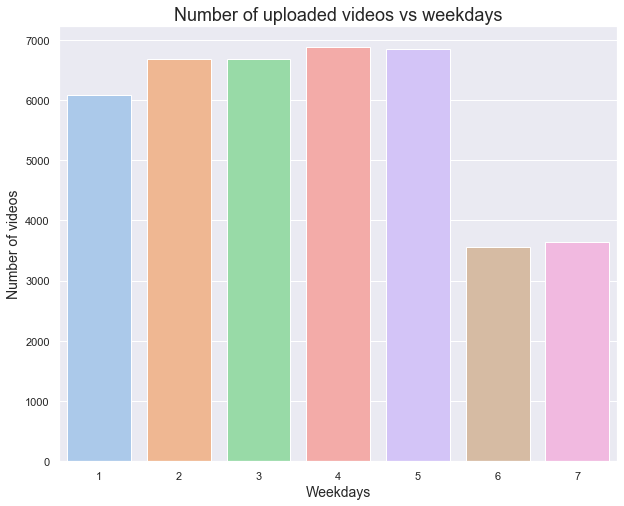

In [16]:
weekdays = USvideos["publish_weekday"].value_counts()

palette = sns.color_palette("pastel")

sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(weekdays.index.values,  weekdays.values, palette = palette)
ax.set_title('Number of uploaded videos vs weekdays', fontsize =18)
ax.set_xlabel('Weekdays', fontsize =14)
ax.set_ylabel('Number of videos', fontsize =14);

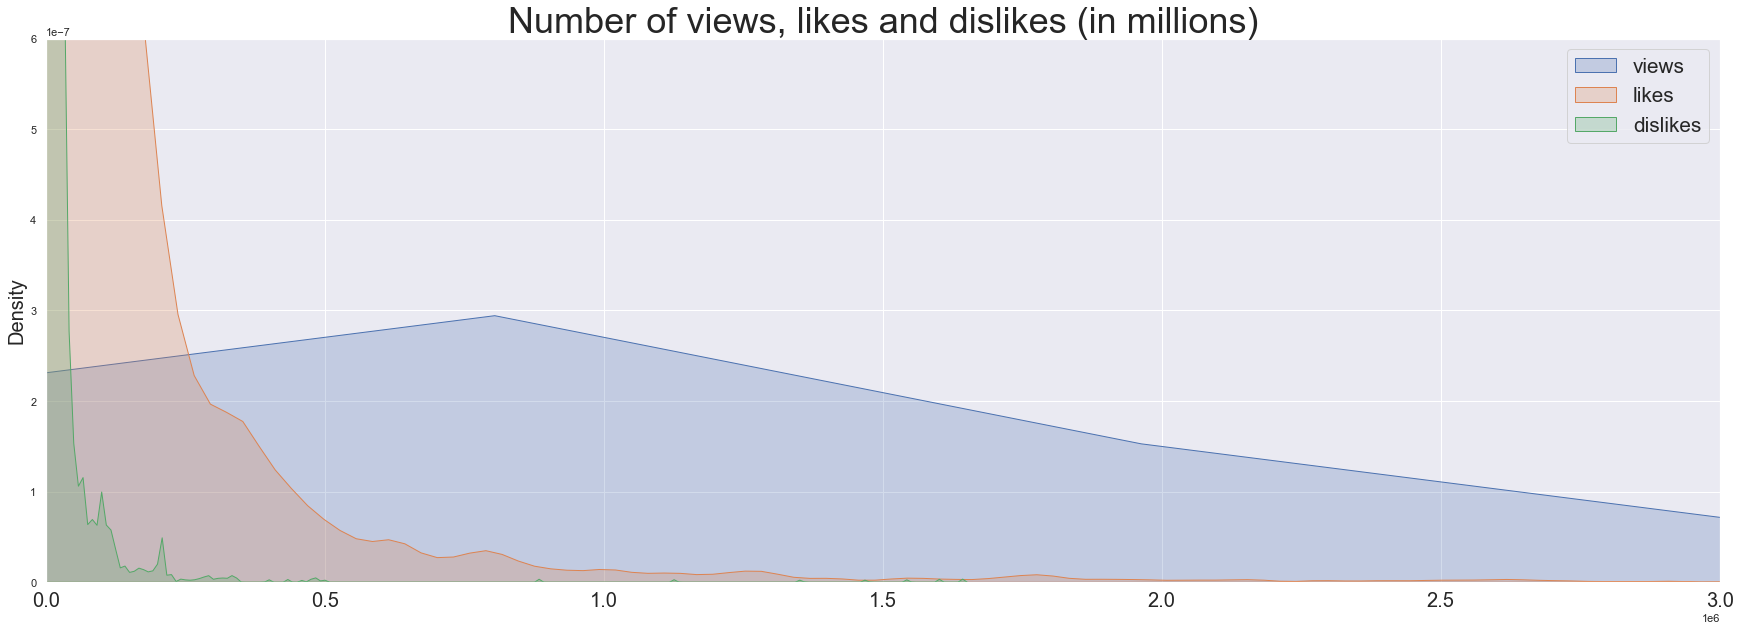

In [17]:
#sns.set(rc={'figure.figsize':(20,18)})
plt.figure( figsize= (30,10) )

ax = sns.kdeplot(data = USvideos['views'], shade = True)
ax = sns.kdeplot(data = USvideos['likes'] , shade = True)
ax = sns.kdeplot(data = USvideos['dislikes'], shade = True)

plt.xlim( ( 0 , 3e6) )
plt.ylim( ( 0 , 6000e-10 ) )
plt.legend(labels=['views', 'likes', 'dislikes'],fontsize='xx-large', title_fontsize='44')
plt.xticks(fontsize=20)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
ax.set_xlabel("")
ax.set_ylabel("Density", fontsize=20)
ax.set_title("Number of views, likes and dislikes (in millions)",fontsize=36);

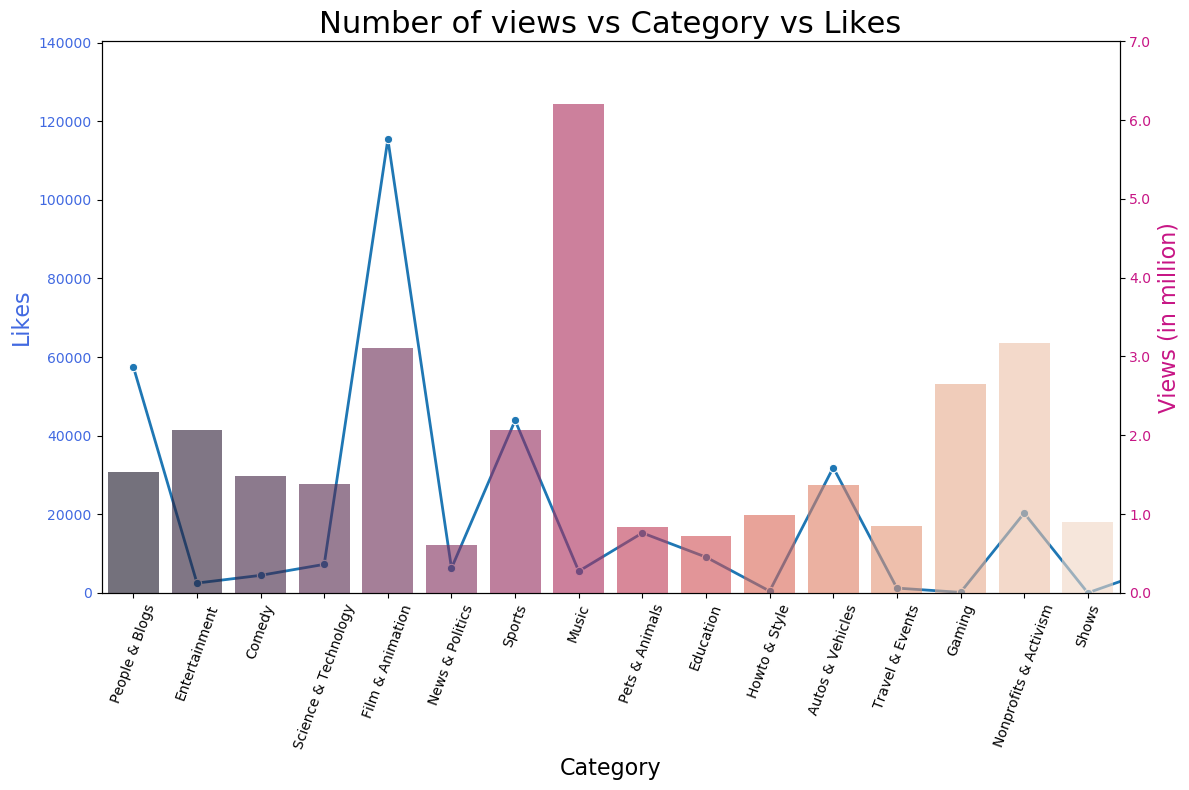

In [18]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,8))
ax1 = plt.gca()

ax1.set_title('Number of views vs Category vs Likes', fontsize=22)
ax1.set_xlabel('Category', fontsize=16)
ax1.set_ylabel('Likes', fontsize=16,color='royalblue')
plt.xticks(rotation=70)
plt.yticks(color='royalblue')
ax1.set_ylim([0,max(USvideos['likes'])/40])

ax2 = sns.lineplot(data = USvideos['likes'], marker='o', sort = False, ax=ax1,linewidth=2)
ax2 = ax1.twinx()

ax2 = sns.barplot(USvideos['snippet/title'],USvideos['views'], alpha=0.6, ax=ax2,ci=None,palette="rocket")
ax2.set_ylabel('Views (in million)', fontsize=16,color="mediumvioletred")
plt.yticks(ax2.get_yticks(), ax2.get_yticks()//1e6,color="mediumvioletred")

plt.tight_layout()


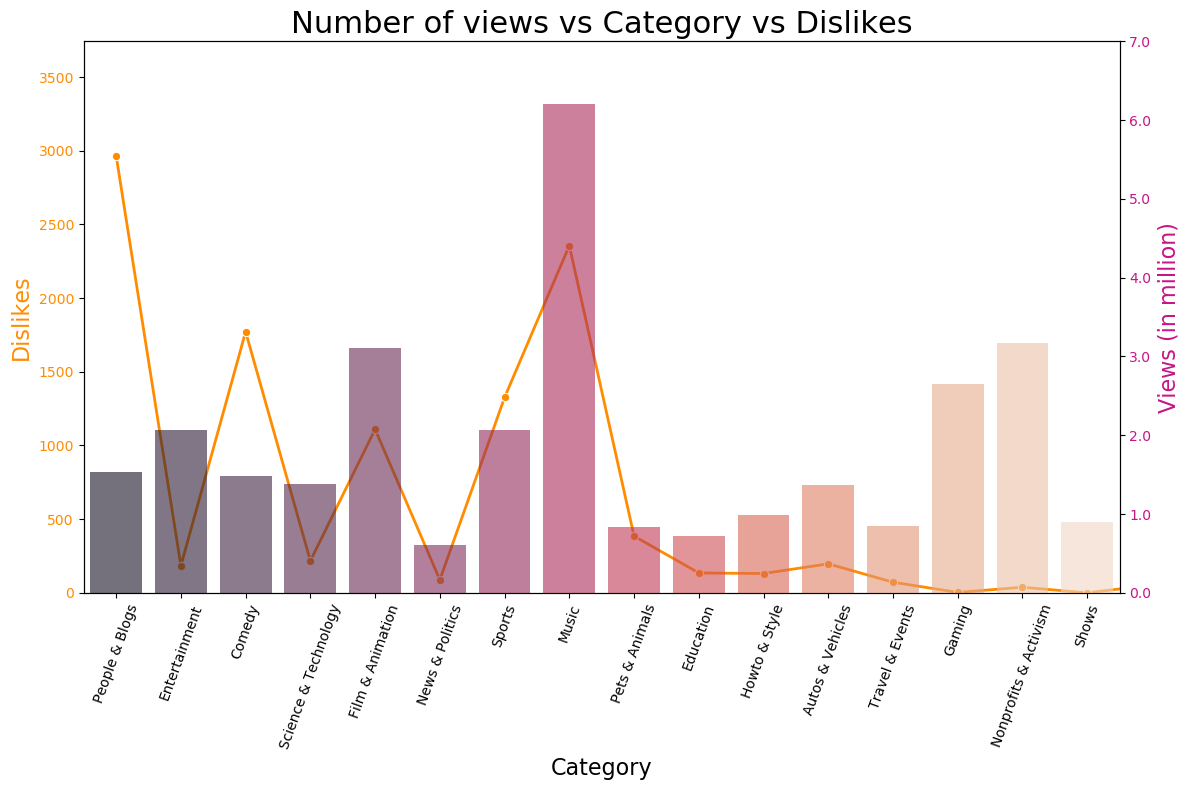

In [19]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,8))
ax1 = plt.gca()

ax1.set_title('Number of views vs Category vs Dislikes', fontsize=22)
ax1.set_xlabel('Category', fontsize=16)
ax1.set_ylabel('Dislikes', fontsize=16,color='darkorange')
plt.xticks(rotation=70)
plt.yticks(color='darkorange')
ax1.set_ylim([0,max(USvideos['likes'])/1500])

ax2 = sns.lineplot(data = USvideos['dislikes'], marker='o', sort = False, ax=ax1,linewidth=2,color='darkorange')
ax2 = ax1.twinx()

ax2 = sns.barplot(USvideos['snippet/title'],USvideos['views'], alpha=0.6, ax=ax2,ci=None,palette="rocket")
ax2.set_ylabel('Views (in million)', fontsize=16,color="mediumvioletred")
plt.yticks(ax2.get_yticks(), ax2.get_yticks()//1e6,color="mediumvioletred")

plt.tight_layout()


#### Wordcloud showing the words in tags regarding to their frequencies.

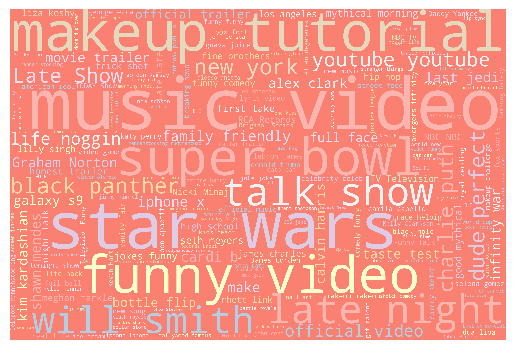

In [20]:
text = "".join(tags for tags in USvideos['tags'])
stopwords = set(STOPWORDS)
stopwords.update(['https', 't','co', 'many', 's'])

#wordcloud = WordCloud(stopwords=stopwords, background_color='black').generate(text)
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', stopwords = STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Correlation Matrix
#### Likes and views are highly correlated.

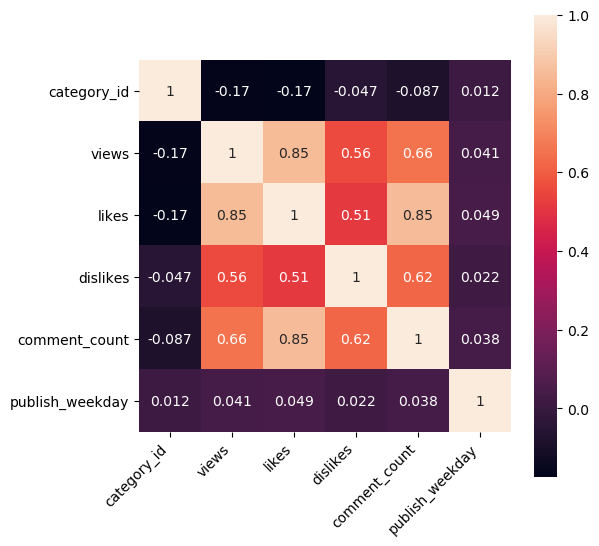

In [21]:
corr = USvideos.corr()
plt.figure(figsize=(6, 6))
ax = sns.heatmap(
    corr,     
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Removing non correlated features

In [22]:
USvideos.drop(['trending_date','publish_date','publish_time','tags','title','description','channel_title','snippet/title'],axis=1,inplace=True)

# Machine Learning Algorithms
---------------------------------------------------------------------

## Prediction for views

##### Spliting the data into train (70%) and test(30%)

In [23]:
views=USvideos['views']
USvideos_view=USvideos.drop(['views'],axis=1,inplace=False)

In [24]:
X_train,X_test,y_train,y_test=train_test_split(USvideos_view,views, test_size=0.3,shuffle=False)

In [25]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(28265, 5) (12114, 5) (28265,) (12114,)


#### We have 27697 data to train and 27697 data to test.

### Linear Regression

#### Machine learning part

In [27]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Prediction part

In [28]:
y_pred = reg.predict(X_test)
print('Variance score: %.2f' % r2_score(y_test, y_pred)) # The higher the R-squared, the better the model fits your data
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred))) #  It indicates the absolute fit of the model to the data–how close the 
#observed data points are to the model’s predicted values. 
print("Result :",reg.score(X_test, y_test))

Variance score: 0.78
Root means score 5313690.482665997
Result : 0.780908966101816


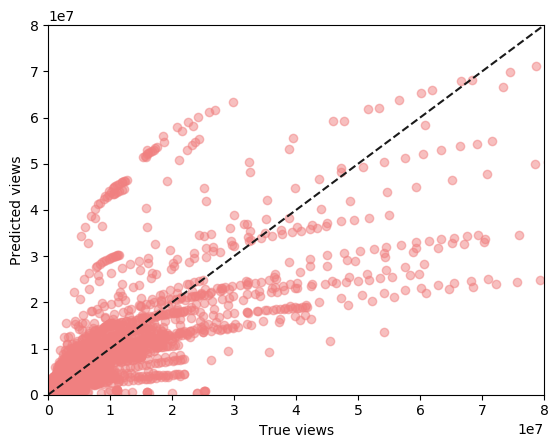

In [29]:
plt.scatter(y_test,y_pred,c='lightcoral',alpha=0.5)
plt.plot([0, 2e8], [0, 2e8], '--k')
plt.ylim([0,8e7])
plt.xlim([0,8e7])
plt.xlabel('True views')
plt.ylabel('Predicted views')
plt.show()

### Random Forest

In [30]:
n_estimators = [30,40,50,60]
depth = [3,4,5,6]
RF = RandomForestRegressor()
hyperParam = [{'n_estimators':n_estimators,'max_depth': depth}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)
gsv.fit(X_train, y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(n_estimators),len(depth))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   42.8s finished


Best HyperParameter:  {'max_depth': 4, 'n_estimators': 40}
0.6457130118961093


#### Then we apply the best hyperparameter

#### Machine learning part

In [31]:
depth_best=gsv.best_params_['max_depth']
n_estimators_best=gsv.best_params_['n_estimators']
RF_best = RandomForestRegressor(n_estimators = n_estimators_best,max_depth=depth_best)
RF_best.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

#### Predicting part

In [32]:
# predicting the  test set results
y_pred = RF_best.predict(X_test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",RF_best.score(X_test, y_test))

Root means score 5633891.776498567
Variance score: 0.75
Result : 0.7537086846905366


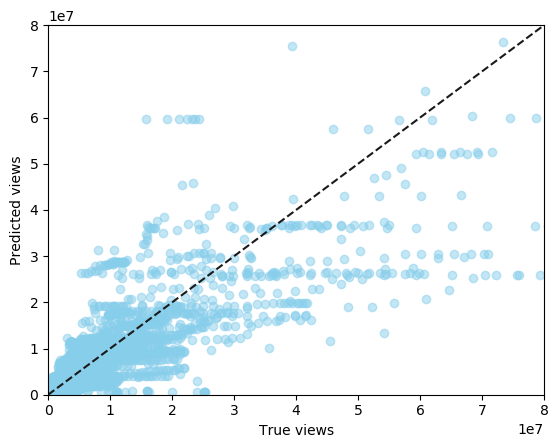

In [33]:
plt.scatter(y_test,y_pred,c='skyblue',alpha=0.5)
plt.plot([0, 2e8], [0, 2e8], '--k')
plt.ylim([0,8e7])
plt.xlim([0,8e7])
plt.xlabel('True views')
plt.ylabel('Predicted views')
plt.show()

## Prediction for likes

##### Spliting the data into train (70%) and test(30%)


In [34]:
likes=USvideos['likes']
USvideos_likes=USvideos.drop(['likes'],axis=1,inplace=False)

In [35]:
X_train2,X_test2,y_train2,y_test2=train_test_split(USvideos_likes,likes, test_size=0.3,shuffle=False)

### Linear Regression

#### Machine learning part

In [37]:
reg.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Prediction part

In [38]:
y_pred2 = reg.predict(X_test2)
print('Variance score: %.2f' % r2_score(y_test2, y_pred2)) # The higher the R-squared, the better the model fits your data
print('Root means score', np.sqrt(mean_squared_error(y_test2, y_pred2))) #  It indicates the absolute fit of the model to the data–how close the 
#observed data points are to the model’s predicted values. 
print("Result :",reg.score(X_test2, y_test2))

Variance score: 0.91
Root means score 104190.61871930702
Result : 0.9119752818242721


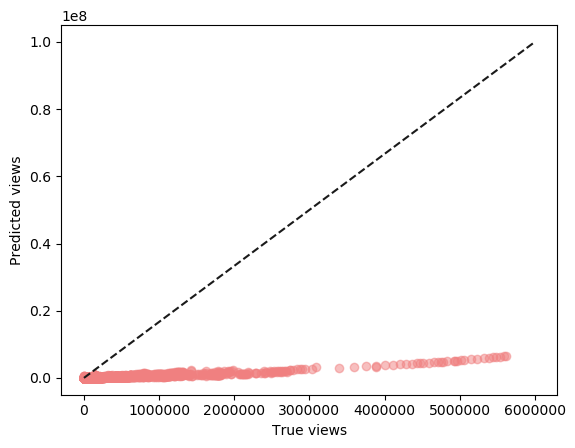

In [39]:
plt.scatter(y_test2,y_pred2,c='lightcoral',alpha=0.5)
plt.plot([0, 6e6], [0, 10e7], '--k')
plt.xlabel('True views')
plt.ylabel('Predicted views')
plt.show()

### Random Forest

In [40]:
n_estimators = [60,80,100,120]
depth = [3,4,5,6]
RF = RandomForestRegressor()
hyperParam = [{'n_estimators':n_estimators,'max_depth': depth}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)
gsv.fit(X_train2, y_train2)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(n_estimators),len(depth))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.2min finished


Best HyperParameter:  {'max_depth': 5, 'n_estimators': 80}
0.7525291046281363


#### Then we apply the best hyperparameter

#### Machine learning part

In [41]:
depth_best=gsv.best_params_['max_depth']
n_estimators_best=gsv.best_params_['n_estimators']
RF_best = RandomForestRegressor(n_estimators = n_estimators_best,max_depth=depth_best)
RF_best.fit(X_train2, y_train2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=80,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

#### Predicting part

In [42]:
# predicting the  test set results
y_pred2 = RF_best.predict(X_test2)
print('Root means score', np.sqrt(mean_squared_error(y_test2, y_pred2)))
print('Variance score: %.2f' % r2_score(y_test2, y_pred2))
print("Result :",RF_best.score(X_test2, y_test2))

Root means score 155784.1158728512
Variance score: 0.80
Result : 0.8032141998627278


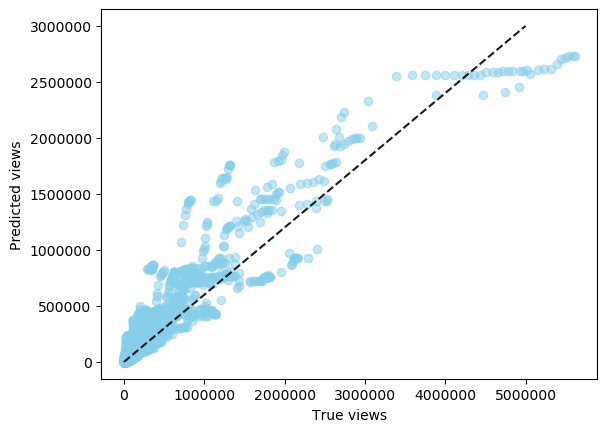

In [43]:
plt.scatter(y_test2,y_pred2,c='skyblue',alpha=0.5)
plt.plot([0, 5e6], [0, 3e6], '--k')
plt.xlabel('True views')
plt.ylabel('Predicted views')
plt.show()

## Prediction for number of comments

##### Spliting the data into train (70%) and test(30%)

In [44]:
comments=USvideos['comment_count']
USvideos_comments=USvideos.drop(['comment_count'],axis=1,inplace=False)

In [45]:
X_train3,X_test3,y_train3,y_test3=train_test_split(USvideos_comments,comments, test_size=0.3,shuffle=False)

### Linear Regression

#### Machine learning part

In [47]:
reg.fit(X_train3,y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Prediction part

In [48]:
y_pred3 = reg.predict(X_test3)
print('Variance score: %.2f' % r2_score(y_test3, y_pred3)) # The higher the R-squared, the better the model fits your data
print('Root means score', np.sqrt(mean_squared_error(y_test3, y_pred3))) #  It indicates the absolute fit of the model to the data–how close the 
#observed data points are to the model’s predicted values. 
print("Result :",reg.score(X_test3, y_test3))

Variance score: 0.80
Root means score 23067.33374075203
Result : 0.802691124715655


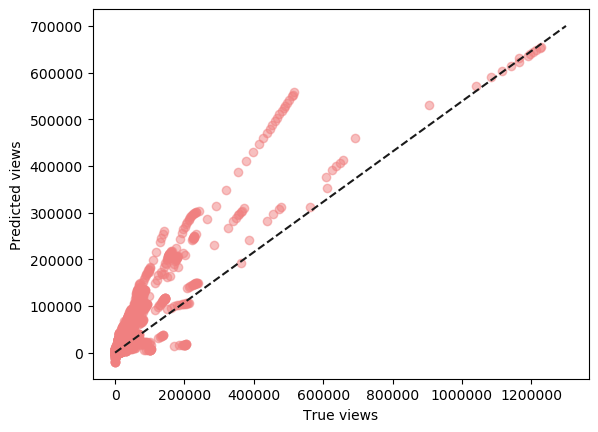

In [49]:
plt.scatter(y_test3,y_pred3,c='lightcoral',alpha=0.5)
plt.plot([0, 13e5], [0, 7e5], '--k')
plt.xlabel('True views')
plt.ylabel('Predicted views')
plt.show()

### Random Forest

In [50]:
n_estimators = [60,80,100,120]
depth = [3,4,5,6]
RF = RandomForestRegressor()
hyperParam = [{'n_estimators':n_estimators,'max_depth': depth}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)
gsv.fit(X_train3, y_train3)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(n_estimators),len(depth))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Best HyperParameter:  {'max_depth': 3, 'n_estimators': 80}
0.5194875856762318


#### Then we apply the best hyperparameter

#### Machine learning part

In [51]:
depth_best=gsv.best_params_['max_depth']
n_estimators_best=gsv.best_params_['n_estimators']
RF_best = RandomForestRegressor(n_estimators = n_estimators_best,max_depth=depth_best)
RF_best.fit(X_train3, y_train3)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=80,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

#### Predicting part

In [52]:
# predicting the  test set results
y_pred3 = RF_best.predict(X_test3)
print('Root means score', np.sqrt(mean_squared_error(y_test3, y_pred3)))
print('Variance score: %.2f' % r2_score(y_test3, y_pred3))
print("Result :",RF_best.score(X_test3, y_test3))

Root means score 30899.963882460474
Variance score: 0.65
Result : 0.645947417601674


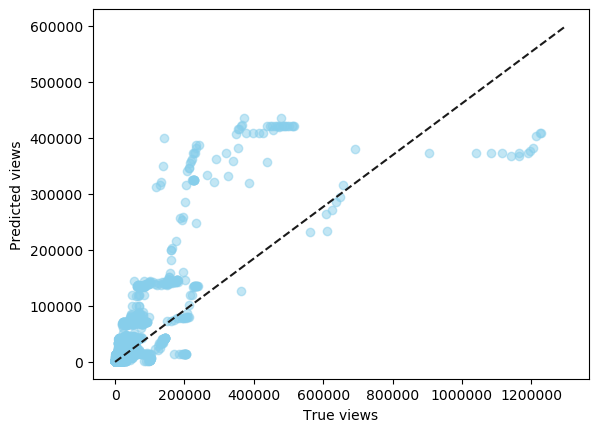

In [53]:
plt.scatter(y_test3,y_pred3,c='skyblue',alpha=0.5)
plt.plot([0, 13e5], [0, 6e5], '--k')
plt.xlabel('True views')
plt.ylabel('Predicted views')
plt.show()

End of the project.

In [54]:
print("Seyda Nur DEMIR, 12 10 44 042")

Seyda Nur DEMIR, 12 10 44 042
